# C-More

### 1. Process text for sentiment analysis

In [1]:
import json
import pandas as pd

import nltk
from nltk import pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

import spacy

#### 1.1. Load json data into a dataframe

In [2]:
list_json = []

with open('tweet_json_1day.txt') as file:
    for line in file:
        data = json.loads(line)
        list_json.append(data)

df = pd.DataFrame(list_json, columns = ['id', 'text', 'lang', 'created_at', 'public_metrics'])

#### 1.2. Select only tweets in English

In [3]:
df_en = df[df['lang'] == 'en'].copy()

In [4]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 0 to 7151
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5377 non-null   object
 1   text            5377 non-null   object
 2   lang            5377 non-null   object
 3   created_at      5377 non-null   object
 4   public_metrics  5377 non-null   object
dtypes: object(5)
memory usage: 252.0+ KB


In [5]:
columns_to_remove = ['lang', 'created_at', 'public_metrics']

df_en.drop(columns_to_remove, axis=1, inplace=True)

In [6]:
df_en.head()

,id,text
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...


#### 1.3. Process text with NLTK

We are now processing our text for sentiment analysis. Our first approach will be to tokenize it and remove stop words.

In [7]:
# tokenization

tweet_tokenizer = TweetTokenizer(reduce_len=True, strip_handles=True)
# redule_len=True replaces repeated character sequences of length 3 or greater with sequences of length 3
# examples: waaaaayyyy --> waaayyy
# strip_handles=True removes Twitter handles (@xxxx...)

In [8]:
# stop words

stopwords = set(nltk.corpus.stopwords.words('english'))

In [9]:
# remove stop words

def remove_stop(tokens):
    return [token for token in tokens if token not in stopwords]

In [10]:
pipeline = [tweet_tokenizer.tokenize, remove_stop] # this will be our default pipeline
# tokenizes text and removes stop words

def process_text(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [11]:
df_nltk = df_en.copy()

In [12]:
%%time

df_nltk['tokens'] = df_nltk['text'].apply(process_text, pipeline=pipeline)

Wall time: 771 ms


In [13]:
df_nltk

,id,text,tokens
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,[breakfast]
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[respect, chicken, nuggets, crispy, chicken, s..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[All, right, I'm, tapping, save, sanity, ., Su..."
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[bad, im, sending, 8, mcdonalds, large, fries,..."
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[Last, time, I, went, McDonalds, ., lol, https..."
...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,"[belos, comes, back, give, mcdonalds, sprite]"
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[mcdonalds, suddenly, 4, school, buses, filled..."
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[IM, SORRY, I, TOLD, U, TO, DRINK, MCDONALDS, ..."
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[Tough, times, inflation, shrinking, large, fr..."


Instead of using simple tokens, we can stem or lemmatize them. We will lemmatize them in our next approach. To do this, we need to have the part-of-speech tags for each token.

In [14]:
# select longest tweet for testing purposes

test_text = sorted(df_en['text'], key=lambda x: len(x), reverse=True)[0]

test_text

'@bungoman @moothought @__justplaying @heavenbent11 @IgorBrigadir @huggingpuppy @flybottlemist @panchromaticity @temujin9 @Duderichy @jicapal @goblinodds @_brentbaum @scrmshw @OccultBoyscout @bogmeat @Knipps @OneEyedAlpaca @SoupOfToday @Acre108 @ObserverSuns @ZacharyHundley @_holyweather @anonynaut @magicianbrain @mimi10v3 @karnagraha @er1enney0ung @Lithros @parafactual @KrikkitMotel @__frye @eggprophet @pareinoia @TeddyRaccovelt @dancinghorse16 @storebrandguy @NLRG_ @irafeierabend @bloobsandnoods @RootOfUnity @VesselOfSpirit @MaskOfFace @ObjectOfObjects @CurlOfGradient @FingerOfHand @CauseOfProblem @ModelOfTheory @ReneeSolana @quotidiania Good morning to all you wonderful people. I just tried a new coffee from McDonalds and it is wonderful, just like you'

In [15]:
pos_tag(tweet_tokenizer.tokenize(test_text))

[('Good', 'JJ'),
 ('morning', 'NN'),
 ('to', 'TO'),
 ('all', 'DT'),
 ('you', 'PRP'),
 ('wonderful', 'JJ'),
 ('people', 'NNS'),
 ('.', '.'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('tried', 'VBD'),
 ('a', 'DT'),
 ('new', 'JJ'),
 ('coffee', 'NN'),
 ('from', 'IN'),
 ('McDonalds', 'NNP'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('wonderful', 'JJ'),
 (',', ','),
 ('just', 'RB'),
 ('like', 'IN'),
 ('you', 'PRP')]

Since our lemmatizer, `WordNetLemmatizer`, uses WordNet tags, we need to convert NLTK's default tags (Penn Treebank part-of-speech tags) to WordNet tags.

In [16]:
# check tags (example for PRP)

nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [17]:
def normalize(text, tokenizer=TweetTokenizer(reduce_len=True, strip_handles=True), lemmatizer=WordNetLemmatizer(), stop_words=stopwords):
    '''
    Normalizes review by removing stopwords and lemmatizing tokens.
    '''
    
    def lemmatize(token, tag):
        '''
        Converts Penn Treebank part-of-speech tags (the default tag set in nltk.pos_tag)
        to WordNet tags - defaults to wn.Noun if the first letter of the Penn Treebank pos tag
        is neither 'N', 'V', 'R' or 'J'.
        Returns lemmatized token.
        '''        
        wordnet_tag = {
            'N': wn.NOUN, 
            'V': wn.VERB,
            'R': wn.ADV,
            'J': wn.ADJ
        }.get(tag[0], wn.NOUN)
        
        return lemmatizer.lemmatize(token, wordnet_tag)
    
    return [lemmatize(token, tag)  
            for (token, tag) in pos_tag(tokenizer.tokenize(text)) 
            if token not in stop_words]

In [18]:
normalize(test_text)

['Good',
 'morning',
 'wonderful',
 'people',
 '.',
 'I',
 'try',
 'new',
 'coffee',
 'McDonalds',
 'wonderful',
 ',',
 'like']

In [19]:
%%time

df_nltk['lemmas'] = df_nltk['text'].apply(normalize)

Wall time: 7.65 s


In [20]:
df_nltk

,id,text,tokens,lemmas
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,[breakfast],[breakfast]
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[respect, chicken, nuggets, crispy, chicken, s...","[respect, chicken, nugget, crispy, chicken, sa..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[All, right, I'm, tapping, save, sanity, ., Su...","[All, right, I'm, tap, save, sanity, ., Summin..."
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[bad, im, sending, 8, mcdonalds, large, fries,...","[bad, im, send, 8, mcdonalds, large, fry, u, rn]"
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[Last, time, I, went, McDonalds, ., lol, https...","[Last, time, I, go, McDonalds, ., lol, https:/..."
...,...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,"[belos, comes, back, give, mcdonalds, sprite]","[belos, come, back, give, mcdonalds, sprite]"
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[mcdonalds, suddenly, 4, school, buses, filled...","[mcdonalds, suddenly, 4, school, bus, fill, te..."
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[IM, SORRY, I, TOLD, U, TO, DRINK, MCDONALDS, ...","[IM, SORRY, I, TOLD, U, TO, DRINK, MCDONALDS, ..."
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[Tough, times, inflation, shrinking, large, fr...","[Tough, time, inflation, shrink, large, fry, h..."


#### 1.4. Process text with spaCy

In [21]:
nlp = spacy.load('en_core_web_sm')

In [22]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x18ed507c4c0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x18ed507cc40>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x18ecd960270>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x18ed5210c80>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x18ed5210940>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x18ecd960190>)]

These are the default components of spaCy's pipeline.

We can easily disable the components we are not interested in:

In [48]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x18ee292b7c0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x18ee0068ac0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x18edffc9800>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x18edff8fac0>)]

We will use the default components for now:

In [49]:
nlp = spacy.load('en_core_web_sm')

In [50]:
doc = nlp(test_text)

In [51]:
# tokens

for token in doc:
    print(token.text, end="|")

Good|morning|to|all|you|wonderful|people|.|I|just|tried|a|new|coffee|from|McDonalds|and|it|is|wonderful|,|just|like|you|

SpaCy's default tokenizer does not recognize and exclude the Twitter handles. We can try to customise this at a later stage. For now, let's focus on the information we can easily get with spaCy.

In [52]:
test_text = "Good morning to all you wonderful people. I just tried a new coffee from McDonalds and it is wonderful, just like you"
doc = nlp(test_text)

In [53]:
# tokens

for token in doc:
    print(token.text, end="|")

Good|morning|to|all|you|wonderful|people|.|I|just|tried|a|new|coffee|from|McDonalds|and|it|is|wonderful|,|just|like|you|

In [54]:
# lemmas

for token in doc:
    print(token.lemma_, end="|")

good|morning|to|all|you|wonderful|people|.|I|just|try|a|new|coffee|from|McDonalds|and|it|be|wonderful|,|just|like|you|

In [55]:
# is the token part of a “stop list”? 

for token in doc:
    print(token.text, token.is_stop, end="|")

Good False|morning False|to True|all True|you True|wonderful False|people False|. False|I True|just True|tried False|a True|new False|coffee False|from True|McDonalds False|and True|it True|is True|wonderful False|, False|just True|like False|you True|

In [56]:
# does the token consist of alphabetic characters?

for token in doc:
    print(token.text, token.is_alpha, end="|")

Good True|morning True|to True|all True|you True|wonderful True|people True|. False|I True|just True|tried True|a True|new True|coffee True|from True|McDonalds True|and True|it True|is True|wonderful True|, False|just True|like True|you True|

In [57]:
# is the token punctuation? 

for token in doc:
    print(token.text, token.is_punct, end="|")

Good False|morning False|to False|all False|you False|wonderful False|people False|. True|I False|just False|tried False|a False|new False|coffee False|from False|McDonalds False|and False|it False|is False|wonderful False|, True|just False|like False|you False|

In [58]:
# part-of-speech

for token in doc:
    print(token.text, token.pos_, end="|")

Good ADJ|morning NOUN|to ADP|all PRON|you PRON|wonderful ADJ|people NOUN|. PUNCT|I PRON|just ADV|tried VERB|a DET|new ADJ|coffee NOUN|from ADP|McDonalds PROPN|and CCONJ|it PRON|is AUX|wonderful ADJ|, PUNCT|just ADV|like ADP|you PRON|

In [59]:
# syntactic dependency relation

for token in doc:
    print(token.text, token.dep_, end="|")

Good amod|morning npadvmod|to ROOT|all predet|you nmod|wonderful amod|people pobj|. punct|I nsubj|just advmod|tried ROOT|a det|new amod|coffee dobj|from prep|McDonalds pobj|and cc|it nsubj|is conj|wonderful acomp|, punct|just advmod|like prep|you pobj|

In [60]:
# named entity type

for token in doc:
    print(token.text, token.ent_type_, end="|")

Good |morning TIME|to |all |you |wonderful |people |. |I |just |tried |a |new |coffee |from |McDonalds ORG|and |it |is |wonderful |, |just |like |you |

In [61]:
# index of the token within the parent document

for token in doc:
    print(token.text, token.i, end="|")

Good 0|morning 1|to 2|all 3|you 4|wonderful 5|people 6|. 7|I 8|just 9|tried 10|a 11|new 12|coffee 13|from 14|McDonalds 15|and 16|it 17|is 18|wonderful 19|, 20|just 21|like 22|you 23|

For a complete list of token attributes, check https://spacy.io/api/token#attributes .

In [62]:
df_spacy = df_en.copy()

In [63]:
# tokenize text

def tokens(text):
    doc = nlp(text)
    return [tokens.text for tokens in doc]

In [64]:
%%time

# pipeline with all the components

df_spacy['tokens'] = df_spacy['text'].map(tokens)

Wall time: 40.1 s


In [67]:
# disable the parser and ner components

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x18ee006d460>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x18ee006d160>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x18edb1d7c00>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x18edb1d9d80>)]

In [68]:
%%time

# pipeline with disabled components

df_spacy['tokens'] = df_spacy['text'].map(tokens)

Wall time: 19.8 s


In [69]:
df_spacy

,id,text,tokens
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,"[@trashevrythng, @hardevrythng, @McDonalds, an..."
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[@trashevrythng, @hardevrythng, @McDonalds, re..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[@PeePosh2, @Scottschlittenh, @sceley2011, @Jo..."
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[@auauwra, too, bad, i, m, sending, 8, mcdonal..."
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[@_idkjia, Last, time, I, went, to, McDonalds,..."
...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,"[if, belos, comes, back, we, should, just, giv..."
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[we, were, at, mcdonalds, and, suddenly, 4, sc..."
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[IM, SORRY, I, TOLD, U, TO, DRINK, MCDONALDS, ..."
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[Tough, times, @McDonalds, inflation, is, shri..."


In [70]:
# tokenize text and get lemmas

def tokens_and_lemmas(text):
    
    doc = nlp(text)
    
    tokens = [tokens.text for tokens in doc]
    
    lemmas = [tokens.lemma_ for tokens in doc]
    
    return tokens, lemmas

In [71]:
%%time

df_spacy[['tokens', 'lemmas']] = df_spacy.apply(lambda row: tokens_and_lemmas(row['text']), axis='columns', result_type='expand')

Wall time: 18.4 s


In [72]:
df_spacy

,id,text,tokens,lemmas
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,"[@trashevrythng, @hardevrythng, @McDonalds, an...","[@trashevrythng, @hardevrythng, @McDonalds, an..."
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[@trashevrythng, @hardevrythng, @McDonalds, re...","[@trashevrythng, @hardevrythng, @McDonalds, re..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[@PeePosh2, @Scottschlittenh, @sceley2011, @Jo...","[@PeePosh2, @Scottschlittenh, @sceley2011, @Jo..."
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[@auauwra, too, bad, i, m, sending, 8, mcdonal...","[@auauwra, too, bad, I, m, send, 8, mcdonald, ..."
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[@_idkjia, Last, time, I, went, to, McDonalds,...","[@_idkjia, last, time, I, go, to, McDonalds, ...."
...,...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,"[if, belos, comes, back, we, should, just, giv...","[if, belos, come, back, we, should, just, give..."
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[we, were, at, mcdonalds, and, suddenly, 4, sc...","[we, be, at, mcdonald, and, suddenly, 4, schoo..."
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[IM, SORRY, I, TOLD, U, TO, DRINK, MCDONALDS, ...","[IM, sorry, I, tell, u, to, DRINK, MCDONALDS, ..."
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[Tough, times, @McDonalds, inflation, is, shri...","[tough, time, @McDonalds, inflation, be, shrin..."


We have tested 2 ways of processing our text: NLTK and spaCy.

We could now use the processed text to train a model for sentiment analysis if we had labelled data. Since we don't (at least for now), we will leave this supervised approach for later.

We will now focus on a rule-based (or lexicon-based) approach.

### 2. Sentiment analysis

In [337]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import textacy.resources

from textblob import TextBlob

import matplotlib.pyplot as plt

#### 2.1. VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically **attuned to sentiments expressed in social media**, https://github.com/cjhutto/vaderSentiment#features-and-updates .

We'll append 3 columns to our dataset:

* scores with the polarity scores (negative, neutral, positive and compound)
* compound with the extracted compound score
* comp_label with the label derived from the compound score

In [74]:
df_vader = df_en.copy()

In [76]:
sid = SentimentIntensityAnalyzer()

In [77]:
df_vader['scores'] = df_vader['text'].map(lambda tweet: sid.polarity_scores(tweet))

df_vader['compound']  = df_vader['scores'].map(lambda score_dict: score_dict['compound'])

df_vader['comp_label'] = df_vader['compound'].map(lambda comp: 'pos' if comp >=0.05 else ('neg' if comp<=-0.05 else 'neu'))

In [78]:
df_vader

,id,text,scores,compound,comp_label
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4767,pos
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"{'neg': 0.028, 'neu': 0.932, 'pos': 0.04, 'com...",0.2500,pos
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou...",-0.5423,neg
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,pos
...,...,...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.2577,neg
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.1280,neg


In [87]:
print(df_vader[['text', 'comp_label']][0:20].values)

[['@trashevrythng @hardevrythng @McDonalds and the breakfast' 'neu']
 ['@trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga'
  'pos']
 ["@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. \n\nSumming up the first 2 hours:\n\nColorado Buffaloes 🐃 talk yawn.\nTopCat bracket filler.\nNo phone calls.\n\nYou are all gemstones for reading this thread.\n\nWe made it ... together 🤲 ❤️. https://t.co/F8jWl62vYB"
  'pos']
 ['@auauwra too bad im sending 8 mcdonalds large fries to u rn' 'neg']
 ['@_

On a quick inspection, Vader seems to be working fairly well with our tweets.

We defined a threshold of 0.05 for positive sentiment and -0.05 for negative sentiment. We can also change this to better fit our needs.

Our compound values can range from -1 (most extreme negative) and +1 (most extreme positive). With this is mind, we can explore our results a little bit further.

In [90]:
# number of positive, neutral and negative comments

df_vader['comp_label'].value_counts()

pos    2126
neu    1931
neg    1320
Name: comp_label, dtype: int64

In [93]:
# % of positive, neutral and negative comments

(df_vader['comp_label'].value_counts()/len(df_vader)).round(2)

pos    0.40
neu    0.36
neg    0.25
Name: comp_label, dtype: float64

In [108]:
# comments with compound >= 0.7 (extremely positive)

print(df_vader[df_vader['compound'] >= 0.7]['text'].values)

['Spicy Soda Solstice: McDonald’s Celebrates First Day Of Summer With FREE\xa0Sprite https://t.co/zUgY2wTmKx'
 'Spicy Soda Solstice: McDonald’s Celebrates First Day Of Summer With FREE Sprite https://t.co/otEM7TEYKL'
 '@MuuInuOfficial @McDonalds The McMuu Burger three all beef patties, special Muu sauce, triple cheese, onions and a hash brown.  The value meal comes with a Muu muu thickshake.  People will love this and can build a strong association with @MuuInuOfficial https://t.co/cGIvexAgLu'
 '@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse Rich is offended by retirees i

In [109]:
# number of comments with compound >= 0.7 (extremely positive)

len(df_vader[df_vader['compound'] >= 0.7])

448

In [110]:
# comments with compound <= -0.7 (extremely negative)

print(df_vader[df_vader['compound'] <= -0.7]['text'].values)

['did i cry today? yes✅. do i know why i cried? yes✅. did my reason for crying have anything to do with not having a mcdonalds diet coke? no❌. am i going to blame it on the lack of having a mcdonalds diet coke? yes✅.'
 '@Winning4Him He wants to reduce cancer 50% in 25 years? Then let’s get rid of @McDonalds @tacobell and all the other places that serve cancer food.\n\nThen let’s get rid of instant meals laden with chemicals.\n\nAnd to hell with Impossible Meat that is all chemicals.'
 '@_NPOB1 @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson Hey dumb ass that’s what you get for hanging out with scummy people named Sam.'
 "@KingN

In [111]:
# number of comments with compound <= -0.7 (extremely negative)

len(df_vader[df_vader['compound'] <= -0.7])

236

#### 2.2. DepecheMood (textacy)

DepecheMood is an **emotion lexicon** for English and Italian text, mapping individual terms to their emotional valences.

English terms are assigned weights to eight emotions:
    
* AFRAID
* AMUSED
* ANGRY
* ANNOYED
* DONT_CARE
* HAPPY
* INSPIRED
* SAD

In [113]:
rs = textacy.resources.DepecheMood(lang="en", word_rep="lemma", min_freq=2)
# word_rep: Level of text processing used in computing terms' emotion weights.
# "token" => tokenization only;
# "lemma" => tokenization and lemmatization;
# "lemmapos" => tokenization, lemmatization, and part-of-speech tagging.
# min_freq: Minimum number of times that a given term must have appeared
# in the source dataset for it to be included in the emotion weights dict.

# rs.download()
rs.info

{'name': 'depeche_mood',
 'site_url': 'http://www.depechemood.eu',
 'publication_url': 'https://arxiv.org/abs/1810.03660',
 'description': 'A simple tool to analyze the emotions evoked by a text.'}

In [114]:
def mood(text):
    
    doc = textacy.make_spacy_doc(text, lang="en_core_web_sm") # try with a larger english model!
    return sorted(rs.get_emotional_valence(doc).items(), key=lambda x: x[1], reverse=True)

In [116]:
df_dmood = df_en.copy()

In [117]:
%%time

df_dmood['mood'] = df_dmood['text'].map(mood)

Wall time: 44.2 s


In [118]:
df_dmood

,id,text,mood
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,"[(INSPIRED, 0.2372625125468336), (AMUSED, 0.18..."
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[(INSPIRED, 0.1761764058538391), (HAPPY, 0.163..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[(AMUSED, 0.17348974136713963), (INSPIRED, 0.1..."
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[(AMUSED, 0.209625943062423), (INSPIRED, 0.170..."
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[(AMUSED, 0.18659749239960122), (INSPIRED, 0.1..."
...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,"[(AMUSED, 0.2311141889379218), (INSPIRED, 0.17..."
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[(SAD, 0.17622862792694952), (INSPIRED, 0.1463..."
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[(ANNOYED, 0.17724829569942901), (ANGRY, 0.150..."
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[(AMUSED, 0.15621203118362836), (INSPIRED, 0.1..."


In [119]:
df_dmood['mood'].map(lambda x: len(x)).value_counts()

8    5191
0     186
Name: mood, dtype: int64

DepecheMood wasn't able to extract the emotions for 186 tweets. We can try to use a larger language model to see if we can improve this (or try different parameters for the DepecheMood fuction).

We will just remove them for now.

In [120]:
df_dmood[df_dmood['mood'].str.len() == 0]

,id,text,mood
16,1539396841422344194,@dolce65023071 McDonalds....🤮,[]
71,1539394997878984709,@DavidNe14460831 @McDonalds @tacobell All this 👆,[]
88,1539394496835727360,McDonalds Sonic the Hedgehog 3 Happy Meal Toys...,[]
131,1539393144873275393,@banned_brother7 @McDonalds_Toy Kill Twitter.,[]
237,1539389757486411776,@McDonalds 10 what?,[]
...,...,...,...
7047,1539040041992855552,@DanhausenAD @McDonalds Devourer of Combo Meals,[]
7052,1539039773423173633,@DanhausenAD @McDonalds THE HUNGER,[]
7096,1539037405440839683,@McDonalds @seoijns IM UR BIGGEST FAN,[]
7097,1539037377485750273,@McDonalds @seoijns MCDONALDS NOTICE ME,[]


In [121]:
df_dmood.drop(df_dmood[df_dmood['mood'].str.len() == 0].index, inplace=True)

In [122]:
df_dmood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5191 entries, 0 to 7151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5191 non-null   object
 1   text    5191 non-null   object
 2   mood    5191 non-null   object
dtypes: object(3)
memory usage: 162.2+ KB


We can now extract the top-3 emotions for each tweet.

In [124]:
df_dmood['top1_mood'] = df_dmood['mood'].map(lambda x: x[0][0])
df_dmood['top2_mood'] = df_dmood['mood'].map(lambda x: x[1][0])
df_dmood['top3_mood'] = df_dmood['mood'].map(lambda x: x[2][0])

In [125]:
df_dmood

,id,text,mood,top1_mood,top2_mood,top3_mood
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,"[(INSPIRED, 0.2372625125468336), (AMUSED, 0.18...",INSPIRED,AMUSED,HAPPY
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[(INSPIRED, 0.1761764058538391), (HAPPY, 0.163...",INSPIRED,HAPPY,AMUSED
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[(AMUSED, 0.17348974136713963), (INSPIRED, 0.1...",AMUSED,INSPIRED,ANGRY
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[(AMUSED, 0.209625943062423), (INSPIRED, 0.170...",AMUSED,INSPIRED,DONT_CARE
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[(AMUSED, 0.18659749239960122), (INSPIRED, 0.1...",AMUSED,INSPIRED,ANNOYED
...,...,...,...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,"[(AMUSED, 0.2311141889379218), (INSPIRED, 0.17...",AMUSED,INSPIRED,HAPPY
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[(SAD, 0.17622862792694952), (INSPIRED, 0.1463...",SAD,INSPIRED,AMUSED
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[(ANNOYED, 0.17724829569942901), (ANGRY, 0.150...",ANNOYED,ANGRY,DONT_CARE
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[(AMUSED, 0.15621203118362836), (INSPIRED, 0.1...",AMUSED,INSPIRED,DONT_CARE


In [126]:
df_dmood['top1_mood'].value_counts()

INSPIRED     2460
AMUSED       1758
SAD           368
ANGRY         241
DONT_CARE     215
ANNOYED        87
AFRAID         35
HAPPY          27
Name: top1_mood, dtype: int64

In [127]:
df_dmood['top2_mood'].value_counts()

AMUSED       2060
INSPIRED     1541
DONT_CARE     637
ANNOYED       355
ANGRY         271
SAD           227
HAPPY          78
AFRAID         22
Name: top2_mood, dtype: int64

In [128]:
df_dmood['top3_mood'].value_counts()

DONT_CARE    1830
ANNOYED      1055
AMUSED        813
INSPIRED      610
ANGRY         398
SAD           250
HAPPY         188
AFRAID         47
Name: top3_mood, dtype: int64

In [129]:
# tweets where the top1 emotion was angry

for text in df_dmood[df_dmood['top1_mood'] == 'ANGRY']['text']:
    print(text+'\n\n ---------- \n')

“@McDonalds” *wags finger* https://t.co/YYgN1Nxngm

 ---------- 

@Wendys whats is this about shaming @McDonalds?? https://t.co/5Mzhpc5NLZ

 ---------- 

@ryaneshea Damn. Labor shortage is getting intense. The McDonalds in Boulder is paying $19 an hour.

 ---------- 

@BearDown_Ray @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @CoachShieldsUA I'm one of them

 ---------- 

@McDonalds Lucky Frog  ILO is live now on Unicrypt 24th JUNE

PRESALE link: https://t.co/f2Stmx242K

✅ Total Supply: 500,000,000
✅ SC/HC: 80/160 BNB
✅ KYC and Audit
✅ Buy/Sell Tax: 5/5
Huge Marketing

#Luckyfrog #memecoin #X1000

In [131]:
# tweets where the top1 emotion was happy

for text in df_dmood[df_dmood['top1_mood'] == 'HAPPY']['text']:
    print(text+'\n\n ---------- \n')

@McDonalds BAGELS!!!!!!!!!  The sauce on the bagels to die for!!

 ---------- 

@ironmikeluke @Scottschlittenh @BD97 @_NPOB1 @PeePosh2 @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @Free_Lantz @Ben1White @AZJanCR @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 Welp... f him TBH

 ---------- 

@davidtc586 @dabeard @NatGeo McDonalds chicken nuggets

 ---------- 

@WhalmartCoin @McDonalds @Walmart @WhalmartCoin problably supporting them 😅 I'M LOVIN IT ❤👍🏼

#WhalmartArmy #Whalmart #memecoin #bsc #McDonalds

 ---------- 

@McDonalds Ratio tho

 ---------- 

@McDonalds Spicy nuggets!

 ---------- 

Yessssss been wanting this amigo for a while now, thanks @McDonalds #pokemon #pokemongo #pogo #squirtle #squirtlesquad #shinypokemo

We can try to improve the performance of our approch by creating a textacy's corpus first and then analysing the emotions for each doc in the corpus.

In [132]:
# tweets text
tweets_text = tuple(tweet.pop('text') for tweet in list_json)

# public metrics metadata
tweets_meta1 = tuple(tweet.pop('public_metrics') for tweet in list_json)

# other metadata
tweets_meta2 = tuple(tweet for tweet in list_json)

# combine metadata in a single dictionary for each tweet
tweets_meta = []

for dict1, dict2 in zip(tweets_meta2, tweets_meta1):
    tweets_meta.append({**dict1, **dict2})
    
# create desired list of tuples
tweets = list(zip(tweets_text, tweets_meta))

len(tweets)

7153

In [133]:
# get tweets in English

tweets_en = []

for tweet in tweets:
    
    if tweet[1]['lang'] == 'en':
        del tweet[1]['lang']
        tweets_en.append(tweet)

len(tweets_en)

5377

In [134]:
%%time

# create corpus

corpus = textacy.Corpus("en_core_web_sm", tweets_en)

Wall time: 13.9 s


In [135]:
%%time

rs = textacy.resources.DepecheMood(lang="en", word_rep="lemma", min_freq=2)

moods = []

for doc in corpus:
    
    mood = sorted(rs.get_emotional_valence(doc).items(), key=lambda x: x[1], reverse=True)
    
    moods.append({'mood': mood})

Wall time: 3 s


These two steps took less than 20 seconds, while before we needed more than 40 seconds to get a similar result.

In [136]:
df_dmood_corpus = df_en.copy()

In [138]:
# reset index

df_dmood_corpus.reset_index(inplace=True, drop=True)

In [140]:
df_dmood_corpus['mood'] = pd.DataFrame(moods)

In [141]:
df_dmood_corpus

,id,text,mood
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,"[(INSPIRED, 0.2372625125468336), (AMUSED, 0.18..."
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[(INSPIRED, 0.1761764058538391), (HAPPY, 0.163..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[(AMUSED, 0.17348974136713963), (INSPIRED, 0.1..."
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[(AMUSED, 0.209625943062423), (INSPIRED, 0.170..."
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[(AMUSED, 0.18659749239960122), (INSPIRED, 0.1..."
...,...,...,...
5372,1539035600451514375,if belos comes back we should just give him a ...,"[(AMUSED, 0.2311141889379218), (INSPIRED, 0.17..."
5373,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[(SAD, 0.17622862792694952), (INSPIRED, 0.1463..."
5374,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[(ANNOYED, 0.17724829569942901), (ANGRY, 0.150..."
5375,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[(AMUSED, 0.15621203118362836), (INSPIRED, 0.1..."


In [142]:
df_dmood_corpus.drop(df_dmood_corpus[df_dmood_corpus['mood'].str.len() == 0].index, inplace=True)

In [143]:
df_dmood_corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5191 entries, 0 to 5376
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5191 non-null   object
 1   text    5191 non-null   object
 2   mood    5191 non-null   object
dtypes: object(3)
memory usage: 162.2+ KB


In [144]:
df_dmood_corpus['top1_mood'] = df_dmood_corpus['mood'].map(lambda x: x[0][0])
df_dmood_corpus['top2_mood'] = df_dmood_corpus['mood'].map(lambda x: x[1][0])
df_dmood_corpus['top3_mood'] = df_dmood_corpus['mood'].map(lambda x: x[2][0])

In [145]:
df_dmood_corpus

,id,text,mood,top1_mood,top2_mood,top3_mood
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,"[(INSPIRED, 0.2372625125468336), (AMUSED, 0.18...",INSPIRED,AMUSED,HAPPY
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,"[(INSPIRED, 0.1761764058538391), (HAPPY, 0.163...",INSPIRED,HAPPY,AMUSED
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,"[(AMUSED, 0.17348974136713963), (INSPIRED, 0.1...",AMUSED,INSPIRED,ANGRY
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,"[(AMUSED, 0.209625943062423), (INSPIRED, 0.170...",AMUSED,INSPIRED,DONT_CARE
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,"[(AMUSED, 0.18659749239960122), (INSPIRED, 0.1...",AMUSED,INSPIRED,ANNOYED
...,...,...,...,...,...,...
5372,1539035600451514375,if belos comes back we should just give him a ...,"[(AMUSED, 0.2311141889379218), (INSPIRED, 0.17...",AMUSED,INSPIRED,HAPPY
5373,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,"[(SAD, 0.17622862792694952), (INSPIRED, 0.1463...",SAD,INSPIRED,AMUSED
5374,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,"[(ANNOYED, 0.17724829569942901), (ANGRY, 0.150...",ANNOYED,ANGRY,DONT_CARE
5375,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,"[(AMUSED, 0.15621203118362836), (INSPIRED, 0.1...",AMUSED,INSPIRED,DONT_CARE


#### 2.3. TextBlob

We can also use TextBlob to perform sentiment analysis.

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range \[-1.0, 1.0\]. The subjectivity is a float within the range \[0.0, 1.0\] where 0.0 is very objective and 1.0 is very subjective.

We will use the corpus we have created to get the sentiment for each tweet with TextBlob.

In [173]:
%%time

pol = []
subj = []

for doc in corpus:
    
    tblob = TextBlob(doc.text)
    
    pol.append({'polarity': tblob.sentiment.polarity})
    subj.append({'subjectivity': tblob.sentiment.subjectivity})

Wall time: 1.46 s


In [174]:
df_tblob = df_en.copy()

In [175]:
# reset index

df_tblob.reset_index(inplace=True, drop=True)

In [176]:
df_tblob['polarity'] = pd.DataFrame(pol)
df_tblob['subjectivity'] = pd.DataFrame(subj)

Like we did with VADER, we can add a column to our dataframe based on the polarity score we've just obtained.

In [177]:
df_tblob['label'] = df_tblob['polarity'].map(lambda pol: 'pos' if pol >=0.05 else ('neg' if pol <=-0.05 else 'neu'))

In [178]:
df_tblob

,id,text,polarity,subjectivity,label
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,0.000000,0.000000,neu
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,-0.600000,0.950000,neg
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0.267857,0.434524,pos
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,-0.242857,0.547619,neg
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,0.400000,0.383333,pos
...,...,...,...,...,...
5372,1539035600451514375,if belos comes back we should just give him a ...,0.000000,0.000000,neu
5373,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,0.200000,0.700000,pos
5374,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,-0.500000,1.000000,neg
5375,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,-0.087302,0.630952,neg


In [179]:
print(df_tblob[['text', 'label']][0:20].values)

[['@trashevrythng @hardevrythng @McDonalds and the breakfast' 'neu']
 ['@trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga'
  'neg']
 ["@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. \n\nSumming up the first 2 hours:\n\nColorado Buffaloes 🐃 talk yawn.\nTopCat bracket filler.\nNo phone calls.\n\nYou are all gemstones for reading this thread.\n\nWe made it ... together 🤲 ❤️. https://t.co/F8jWl62vYB"
  'pos']
 ['@auauwra too bad im sending 8 mcdonalds large fries to u rn' 'neg']
 ['@_

In [193]:
# number of positive, neutral and negative comments

df_tblob['label'].value_counts()

neu    2467
pos    1979
neg     931
Name: label, dtype: int64

In [194]:
# % of positive, neutral and negative comments

(df_tblob['label'].value_counts()/len(df_tblob)).round(2)

neu    0.46
pos    0.37
neg    0.17
Name: label, dtype: float64

Most of the tweets are labeled as neutral by TextBlob, while with VADER 40% of the the tweets (majority class) were considered to be positive.

In [195]:
# comments with compound >= 0.7 (extremely positive)

print(df_tblob[df_tblob['polarity'] >= 0.7]['text'].values)

['@bsweeet5 @Wendys @McDonalds You think I need a chaperone to catch a flight? Lol'
 '@bsweeet5 @Wendys @McDonalds What’s a lie? Wasn’t they just there….without me lol.'
 'McDonalds Sonic the Hedgehog 3 Happy Meal Toys Dr. Eggman https://t.co/P8PsLMn6iN'
 '😂😂😂🤣🤣🤣🤣🤣 lol i’m passing away fr https://t.co/6PCKS82RNJ'
 '@Ayoo_Nani we always aim to serve you the best quality food, Kay! share your experience with us here: https://t.co/WhvwT8dw7y'
 '@McDonalds oh and thank you for making happy meals a thing'
 '@everythingjh Jay, we intend to get your order perfect every time. reach out to us at: https://t.co/WhvwT8dw7y'
 "@McDonalds at what..White Dips? You keep on and people are gonna REDISCOVER you ! 👌⚠️😷👀💯 And it won't be for a 10 piece Nugget. Remember...I'm Arch Restaurant in Grandview, MO Kiddies ! Chk my BIRTH RECORD AND MARK just in case you SLIPPIN......OH WAIT, YAW SELL BANANAS 🍌? LOL"
 'Thinking abt those hazelnut lattes i used to have at hong kong mcdonalds those were so good'
 '@P

In [197]:
# number of comments with compound >= 0.7 (extremely positive)

len(df_tblob[df_tblob['polarity'] >= 0.7])

214

In [199]:
# comments with compound <= -0.7 (extremely negative)

print(df_tblob[df_tblob['polarity'] <= -0.7]['text'].values)

["@stillgray I don't eat at McDonalds...the food is crap"
 'McDonalds and Dodds viewers shocked at surprise Coronation Street\xa0cameo https://t.co/pEuglFi1Id'
 '@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @BrianHowell33 I think I now hate the state of Colorado. \n\nThank Thor.'
 '@stillgray If you have anger issues go to the gym, not @McDonalds'
 '@stillgray Animal Behavior So Sad - no one should have to put up with this - but as a company McDonalds deserves it - it’s what they support!!!'
 "A Filipino family called a McDonald's drive thru attack caught on camera a hate crime. Pol

In [200]:
# number of comments with compound <= -0.7 (extremely negative)

len(df_tblob[df_tblob['polarity'] <= -0.7])

69

To better compare the results we obtained with VADER and TextBlob we can merge them in a single data frame.

In [294]:
df_tblob

,id,text,polarity,subjectivity,label
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,0.000000,0.000000,neu
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,-0.600000,0.950000,neg
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0.267857,0.434524,pos
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,-0.242857,0.547619,neg
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,0.400000,0.383333,pos
...,...,...,...,...,...
5372,1539035600451514375,if belos comes back we should just give him a ...,0.000000,0.000000,neu
5373,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,0.200000,0.700000,pos
5374,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,-0.500000,1.000000,neg
5375,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,-0.087302,0.630952,neg


In [299]:
df_sent = df_vader[['id', 'text', 'compound', 'comp_label']].merge(df_tblob[['id', 'polarity', 'label', 'subjectivity']], on='id').rename(columns={'compound': 'vader_score', 'comp_label': 'vader_sent', 'polarity': 'tblob_score', 'label': 'tblob_sent', 'subjectivity': 'tblob_subjectivity'})

In [300]:
df_sent

,id,text,vader_score,vader_sent,tblob_score,tblob_sent,tblob_subjectivity
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,0.0000,neu,0.000000,neu,0.000000
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,0.4767,pos,-0.600000,neg,0.950000
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0.2500,pos,0.267857,pos,0.434524
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,-0.5423,neg,-0.242857,neg,0.547619
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,0.4215,pos,0.400000,pos,0.383333
...,...,...,...,...,...,...,...
5372,1539035600451514375,if belos comes back we should just give him a ...,0.0000,neu,0.000000,neu,0.000000
5373,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,0.0000,neu,0.200000,pos,0.700000
5374,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,-0.2577,neg,-0.500000,neg,1.000000
5375,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,-0.1280,neg,-0.087302,neg,0.630952


In [301]:
# common labels for VADER and TextBlob

df_sent[df_sent['vader_sent'] == df_sent['tblob_sent']]

,id,text,vader_score,vader_sent,tblob_score,tblob_sent,tblob_subjectivity
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,0.0000,neu,0.000000,neu,0.000000
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0.2500,pos,0.267857,pos,0.434524
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,-0.5423,neg,-0.242857,neg,0.547619
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,0.4215,pos,0.400000,pos,0.383333
5,1539397429514190848,@McDonalds I'd rather eat my toes,0.0000,neu,0.000000,neu,0.000000
...,...,...,...,...,...,...,...
5370,1539035650120462337,@viz6h @PuroJackal @xoivie mcdonalds is not be...,-0.3412,neg,-0.250000,neg,0.500000
5372,1539035600451514375,if belos comes back we should just give him a ...,0.0000,neu,0.000000,neu,0.000000
5374,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,-0.2577,neg,-0.500000,neg,1.000000
5375,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,-0.1280,neg,-0.087302,neg,0.630952


In [302]:
len(df_sent[df_sent['vader_sent'] == df_sent['tblob_sent']]) / len(df_vader)

0.6217221498977125

VADER and TextBlob are in agreement for 62% of our tweets.

In [303]:
# common positive labels for VADER and TextBlob

df_sent[(df_sent['vader_sent'] == df_sent['tblob_sent']) & (df_sent['vader_sent'] == 'pos')]

,id,text,vader_score,vader_sent,tblob_score,tblob_sent,tblob_subjectivity
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0.2500,pos,0.267857,pos,0.434524
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,0.4215,pos,0.400000,pos,0.383333
13,1539396523993210880,@happytwtdni @McDonalds maybe i’ll get a free ...,0.5106,pos,0.400000,pos,0.800000
15,1539396510110076928,"@CalBeach @McDonalds They are trying to be ""hi...",0.3612,pos,0.400000,pos,0.400000
16,1539396508801388544,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0.4215,pos,0.206250,pos,0.600000
...,...,...,...,...,...,...,...
5358,1539036301760020480,@seoijns care to share more about your experie...,0.6597,pos,0.250000,pos,0.250000
5360,1539036146298232832,@Newdilemma order accuracy is our prime motive...,0.2960,pos,0.500000,pos,0.500000
5362,1539035956266733568,Nobody important is considering ordering a McD...,0.2023,pos,0.400000,pos,1.000000
5365,1539035843620442114,Enter for a McDonalds Gift Card Now! \n1 hambu...,0.4926,pos,0.200000,pos,0.300000


In [304]:
len(df_sent[(df_sent['vader_sent'] == df_sent['tblob_sent']) & (df_sent['vader_sent'] == 'pos')]) / len(df_sent[df_sent['vader_sent'] == 'pos'])

0.6453433678269049

In [305]:
len(df_sent[(df_sent['vader_sent'] == df_sent['tblob_sent']) & (df_sent['vader_sent'] == 'pos')]) / len(df_sent[df_sent['tblob_sent'] == 'pos'])

0.6932794340576048

Of the total number of tweets that VADER considered to be positive, 65% of them were also considered positive by TextBlob.

Of the total number of tweets that TextBlob considered to be positive, 69% of them were also considered positive by VADER.

In [306]:
len(df_sent[(df_sent['vader_sent'] == df_sent['tblob_sent']) & (df_sent['vader_sent'] == 'neg')]) / len(df_sent[df_sent['vader_sent'] == 'neg'])

0.4121212121212121

In [307]:
len(df_sent[(df_sent['vader_sent'] == df_sent['tblob_sent']) & (df_sent['vader_sent'] == 'neg')]) / len(df_sent[df_sent['tblob_sent'] == 'neg'])

0.5843179377013964

Of the total number of tweets that VADER considered to be negative, 41% of them were also considered negative by TextBlob.

Of the total number of tweets that TextBlob considered to be negative, 58% of them were also considered negative by VADER.

In [310]:
# average subjectivity for all the tweets

df_sent['tblob_subjectivity'].mean()

0.34039781376080935

In [311]:
# average subjectivity for tweets where VADER and TextBlob agree

df_sent[(df_sent['vader_sent'] == df_sent['tblob_sent'])]['tblob_subjectivity'].mean()

0.35553851332332137

In [312]:
# average subjectivity for tweets where VADER and TextBlob disagree

df_sent[(df_sent['vader_sent'] != df_sent['tblob_sent'])]['tblob_subjectivity'].mean()

0.31551317332940454

There seems to be no relevant relationship between the subjectivity score and the fact that VADER and TextBlob are in agreement or not.

In [313]:
def vader_textblob(row):  
    if row['vader_sent'] == row['tblob_sent']:
        return 'agree'
    return 'disagree'

In [314]:
df_sent['vader_vs_tblob'] = df_sent.apply(lambda row: vader_textblob(row), axis=1)

In [315]:
df_sent

,id,text,vader_score,vader_sent,tblob_score,tblob_sent,tblob_subjectivity,vader_vs_tblob
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,0.0000,neu,0.000000,neu,0.000000,agree
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,0.4767,pos,-0.600000,neg,0.950000,disagree
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0.2500,pos,0.267857,pos,0.434524,agree
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,-0.5423,neg,-0.242857,neg,0.547619,agree
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,0.4215,pos,0.400000,pos,0.383333,agree
...,...,...,...,...,...,...,...,...
5372,1539035600451514375,if belos comes back we should just give him a ...,0.0000,neu,0.000000,neu,0.000000,agree
5373,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,0.0000,neu,0.200000,pos,0.700000,disagree
5374,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,-0.2577,neg,-0.500000,neg,1.000000,agree
5375,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,-0.1280,neg,-0.087302,neg,0.630952,agree


In [316]:
# number of comments were VADER and TextBlob agree or disagree

df_sent['vader_vs_tblob'].value_counts()

agree       3343
disagree    2034
Name: vader_vs_tblob, dtype: int64

In [317]:
# % of comments were VADER and TextBlob agree or disagree

(df_sent['vader_vs_tblob'].value_counts() / len(df_tblob)).round(2)

agree       0.62
disagree    0.38
Name: vader_vs_tblob, dtype: float64

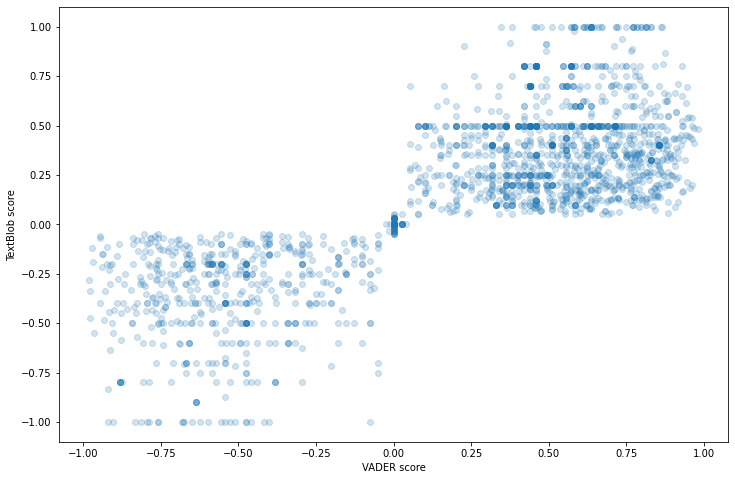

In [338]:
# scatter plot with scores for tweets where VADER and TextBlob agree on label

plt.figure(figsize=(12, 8))

x = df_sent[df_sent['vader_sent'] == df_sent['tblob_sent']]['vader_score']
y = df_sent[df_sent['vader_sent'] == df_sent['tblob_sent']]['tblob_score']

plt.scatter(x, y, alpha=0.2)

plt.xlabel('VADER score')
plt.ylabel('TextBlob score');

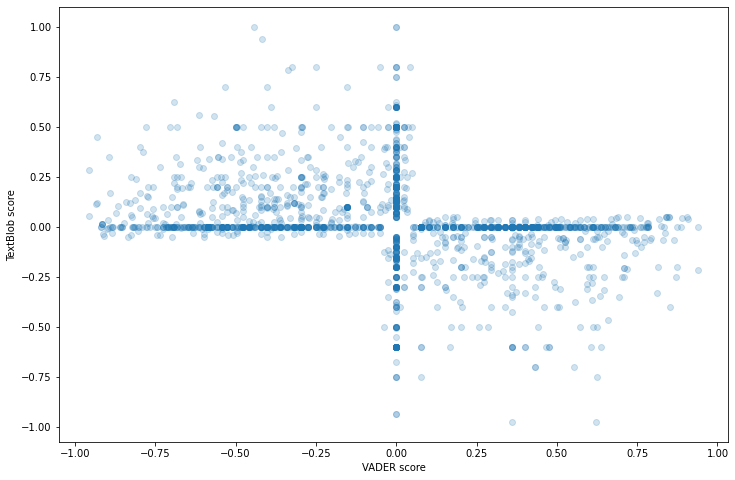

In [339]:
# scatter plot with scores for tweets where VADER and TextBlob agree on label

plt.figure(figsize=(12, 8))

x = df_sent[df_sent['vader_sent'] != df_sent['tblob_sent']]['vader_score']
y = df_sent[df_sent['vader_sent'] != df_sent['tblob_sent']]['tblob_score']

plt.scatter(x, y, alpha=0.2)

plt.xlabel('VADER score')
plt.ylabel('TextBlob score');

There seems to be a huge number of cases where TextBlob considers a tweet to be neutral and VADER doesn't (and vice-versa).

In [342]:
df_sent[(df_sent['vader_sent'] != df_sent['tblob_sent']) & (df_sent['vader_sent'] == 'neu')]

,id,text,vader_score,vader_sent,tblob_score,tblob_sent,tblob_subjectivity,vader_vs_tblob
9,1539397126492684288,"@darth Hypothesis proven!\n\nTuesday, 11 Jan 2...",0.0,neu,0.214286,pos,0.428571,disagree
17,1539396426135769088,@MadisonJune7 His little mcdonalds merch pillo...,0.0,neu,-0.187500,neg,0.500000,disagree
25,1539396011222761472,"@bsweeet5 @Wendys @McDonalds I’m just broke, n...",0.0,neu,0.481481,pos,0.629630,disagree
32,1539395799540375552,seeing bro go from a McDonalds employee to thi...,0.0,neu,0.066667,pos,0.233333,disagree
61,1539394565014278144,@McDonaldsCanada @McDonalds and the new Big Ma...,0.0,neu,0.073939,pos,0.384242,disagree
...,...,...,...,...,...,...,...,...
5328,1539037642465202176,@DrJacobsRad @McDonalds Worked there for 7 yea...,0.0,neu,0.250000,pos,0.200000,disagree
5338,1539037287329185792,@BoredElonMusk @McDonalds How many currencies ...,0.0,neu,0.200000,pos,0.200000,disagree
5340,1539037254949011456,@EngageWill @McDonalds I went there for lunch ...,0.0,neu,-0.600000,neg,1.000000,disagree
5355,1539036447776329729,@McDonalds Now you have a new password.,0.0,neu,0.136364,pos,0.454545,disagree


In [344]:
len(df_sent[(df_sent['vader_sent'] != df_sent['tblob_sent']) & (df_sent['vader_sent'] == 'neu')])

504

In [345]:
df_sent[(df_sent['vader_sent'] != df_sent['tblob_sent']) & (df_sent['tblob_sent'] == 'neu')]

,id,text,vader_score,vader_sent,tblob_score,tblob_sent,tblob_subjectivity,vader_vs_tblob
20,1539396202483138567,take your trans gf to local childrens park and...,-0.1189,neg,0.0,neu,0.0,disagree
21,1539396189442949120,#NewNFTProfilePic NFT by APEasONE @APEasONEnft...,0.3182,pos,0.0,neu,0.0,disagree
26,1539396002376982533,@McDonalds @ysrated omg kay You got a mcdonald...,0.5267,pos,0.0,neu,0.0,disagree
40,1539395416952668160,@Capn_CoolChris @Wendys @McDonalds The pulling...,-0.3164,neg,0.0,neu,0.0,disagree
42,1539395393225515008,"Going to McDonalds, y’all want anything?",0.0772,pos,0.0,neu,0.0,disagree
...,...,...,...,...,...,...,...,...
5341,1539037249374920704,@McDonalds @seoijns PLZ BRING THE BTS MEAL BACK,0.2577,pos,0.0,neu,0.0,disagree
5356,1539036347385667586,YES THEY DO AND IT TASTES LIKE MCDONALDS SPRIT...,0.7695,pos,0.0,neu,0.0,disagree
5357,1539036339827625984,@BMNiedermeyer Trash ass clown who couldn't co...,-0.5423,neg,0.0,neu,0.0,disagree
5359,1539036220801564675,My brother already licking my moms damn mcdona...,-0.4019,neg,0.0,neu,0.0,disagree


In [346]:
len(df_sent[(df_sent['vader_sent'] != df_sent['tblob_sent']) & (df_sent['tblob_sent'] == 'neu')])

1040

More than 1500 tweets were classified as neutral by either VADER or TextBlob but not by both.

Instead of using a threshold of +/- 0.05 for neutral tweets maybe we can increase this value and test different possibilities at around +/- 0.2.